In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [5]:
ir=pd.read_csv('/content/drive/MyDrive/Iris_dataset(SVM).csv')
ir.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower_name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
ir.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   flower_name        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
ir.isnull().sum()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
flower_name,0


In [16]:
x=ir[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']]
y=ir['flower_name']
print(x.shape)
print(y.shape)

(150, 4)
(150,)


In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [18]:
model=SVC(kernel='linear')
model.fit(x_train,y_train)

SVC(kernel='linear')

In [19]:
pred=model.predict(x_test)
print(pred)
print("\nAccuracy:",accuracy_score(y_test,pred))
print("\nConfusion matrix:")
print(confusion_matrix(y_test,pred))
print("\nClassification report:")
print(classification_report(y_test,pred))

['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor' 'virginica' 'setosa'
 'setosa' 'setosa' 'setosa' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'virginica' 'setosa' 'virginica' 'setosa' 'virginica'
 'virginica' 'virginica' 'virginica' 'virginica' 'setosa' 'setosa'
 'setosa' 'setosa' 'versicolor' 'setosa' 'setosa' 'virginica' 'versicolor'
 'setosa' 'setosa' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'setosa']

Accuracy: 1.0

Confusion matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



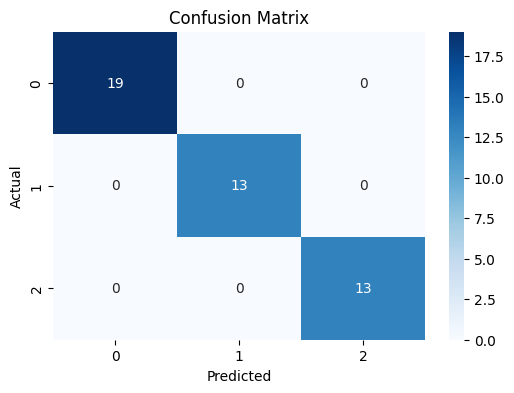

In [20]:
import seaborn as sns
cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

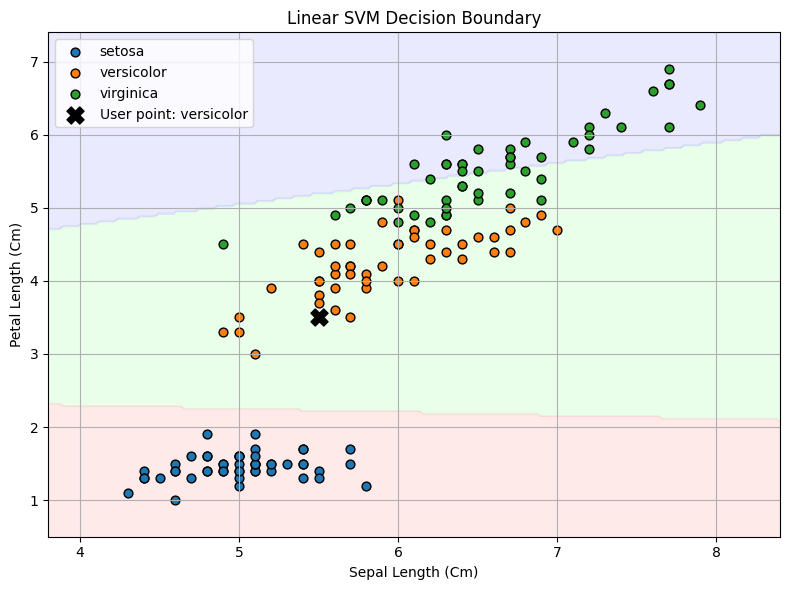

In [22]:
from matplotlib.colors import ListedColormap
# Define the features to be used for plotting the 2D decision boundary
plot_feature_x = "sepal length (cm)"
plot_feature_y = "petal length (cm)"
# Get the ranges for the plotting features
x_min, x_max = x[plot_feature_x].min() - 0.5, x[plot_feature_x].max() + 0.5
y_min, y_max = x[plot_feature_y].min() - 0.5, x[plot_feature_y].max() + 0.5
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 200),
    np.linspace(y_min, y_max, 200)
)
# To predict for the 2D grid, we need to create a 4-feature input for the model
# We will use the mean values for the features not being plotted.
mean_sepal_width = x["sepal width (cm)"].mean()
mean_petal_width = x["petal width (cm)"].mean()
# Create a DataFrame for prediction on the grid points
# Ensure the order of columns matches the training data (X)
grid_data = pd.DataFrame({
    "sepal length (cm)": xx.ravel(),
    "sepal width (cm)": np.full_like(xx.ravel(), mean_sepal_width),
    "petal length (cm)": yy.ravel(),
    "petal width (cm)": np.full_like(xx.ravel(), mean_petal_width),
})
Z_str = model.predict(grid_data)
# Map string labels to numerical values for plotting with contourf
# Get unique species labels and create a numerical mapping from the original species column
unique_species = ir['flower_name'].unique()
species_to_int = {flower_name: i for i, flower_name in
enumerate(unique_species)}
Z_numerical = np.array([species_to_int[s] for s in
Z_str.flatten()]).reshape(xx.shape)
plt.figure(figsize=(8, 6))
# Decision regions
cmap = ListedColormap(["#FFCCCC", "#CCFFCC", "#CCCCFF"])
plt.contourf(xx, yy, Z_numerical, alpha=0.4, cmap=cmap)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
# Training points
for flower_name in ir['flower_name'].unique():
    mask = (ir['flower_name'] == flower_name)
    plt.scatter(
        x.loc[mask, plot_feature_x],
        x.loc[mask, plot_feature_y],
        s=40,
        edgecolor="k",
        label=flower_name
    )
# User input point
# Define the user input point (example values)
sepal_length = 5.5 # Example value for sepal length
petal_length = 3.5 # Example value for petal length
# Predict the class for the user input point
user_point_data = pd.DataFrame({
    "sepal length (cm)": [sepal_length],
    "sepal width (cm)": [mean_sepal_width],
    "petal length (cm)": [petal_length],
    "petal width (cm)": [mean_petal_width],
})
user_pred = model.predict(user_point_data)

plt.scatter(
    sepal_length, # This corresponds to plot_feature_x
    petal_length, # This corresponds to plot_feature_y
    color="black",
    marker="X",
    s=150,
    label=f"User point: {user_pred[0]}"
)
plt.xlabel(f"{plot_feature_x.replace('_', ' ').title()}")
plt.ylabel(f"{plot_feature_y.replace('_', ' ').title()}")
plt.title("Linear SVM Decision Boundary")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()